# 11 Simulation : Grids and Multi-Agent Systems
# Review Exercises - Solutions

# Review Exercise 1 : Game of Life

Create recreating the game of life example. 

Try populating the grid with different starting conditions (you can find some famous initial conditions by searching the internet).

Try changing the rules of the game. 

Save the results of your simulation as an animation. 

# Review Exercise 2 : Particles in a box

In the boids simulation, the boids avoid the walls by *steering*, heading away from the wall on a heading normal to it's surface.

The wall does not provide a physical boundary in this case.

The boid can, for example, fly through the boundary. 

Let's change the problem setting slightly.

- 10 particles
- random starting position
- random starting velocity
- particles can occupy the same space (ignore collisions with other particles)
- if a particle collides with the simulation boundary, it bounces off...



The basic principle when bouncing is that the incoming angle shoudl be equal to the outgong angle. 

<img src="../img/ball.png" alt="Drawing" style="width: 300px;"/>

We can buid a simple kinematic model of the particle collision by neglecting forces (e.g. friction):
- if a particle hits a surface parallel to x axis, $v_y = v_y \times - 1$#
- if a particle hits a surface parallel to y axis, $v_x = v_x \times - 1$

Build a simulation of the problem setting described.

Save an animation of your simulation.

In [4]:
import io 
import base64 
from IPython.display import HTML
video = io.open('../img/bouncing_particles.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video width = "500"  alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

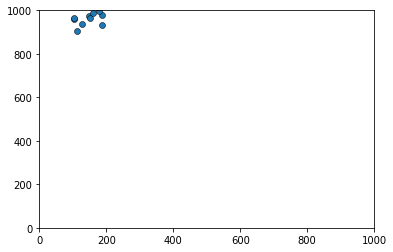

In [11]:
# Example Solution 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

def new_flock(count, minimum, maximum):
    
    return (minimum[:, np.newaxis] + 
            np.random.rand(2, count) * 
            (maximum - minimum)[:, np.newaxis])

def update_boids(positions, velocities):
    "A function to update in each timestep of the simulation"
    
    # Simulate wall
    wall_alert_distance = 1
    
    left = np.copy(positions[0, :])                
    near_map = left < wall_alert_distance           
    velocities[0, near_map]*=-1

    
    right = np.copy(positions[0, :]) - width        
    near_map = right > wall_alert_distance          
    velocities[0, near_map] *= -1                            
    
    
    top = np.copy(positions[1, :]) 
    near_map = top < wall_alert_distance
    velocities[1, near_map] *= -1
    
    bottom = np.copy(positions[1, :]) - height
    near_map = bottom > wall_alert_distance
    velocities[1, near_map] *= -1
    
    positions += velocities                       
    
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

height = 1000
width = 1000
limits = np.array([height, width])   # define edges of simulation environment


# Define positiona and velcoities
positions = new_flock(10, np.array([100, 900]), np.array([200, 1000]))
velocities = new_flock(10, np.array([-40, -20]), np.array([30, 20]))

# Set up figure to animate : scatter plot
figure = plt.figure()                   # create a figure 

axes = plt.axes(xlim=(0, limits[0]),    # choose the figure size
                ylim=(0, limits[1]))

scatter = axes.scatter(positions[0, :], # x values
                       positions[1, :], # y values
                       marker='o', 
                       edgecolor='k', 
                       lw=0.5)




In [12]:


anim = animation.FuncAnimation(figure, 
                               animate,
                               frames=200, 
                               interval=20)


anim.save('img/bouncing_particles.mp4')

HTML(anim.to_jshtml())